# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis

* Formerly 046193 

#### Tal Daniel

## Tutorial 06 - Dimensionality Reduction - Kernels & KPCA

### <img src="https://img.icons8.com/bubbles/100/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Recap: PCA Algorithm
* Kernels
    * The Kernel Trick
* NLPCA- Nonlinear PCA
    * Kernel PCA

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles, make_moons
%matplotlib notebook

### <img src="https://img.icons8.com/dusk/64/000000/flow-chart.png" style="height:50px;display:inline"> PCA Algorithm
1. **Normalize/Standartize** (<a style="color:Tomato">if we use features of different scales, we may get misleading components</a>) and center the data. Given data $X \in \mathcal{R}^{m \times N}$, where $m$ is the number of features and $N$ is the number of samples, normalization: $$ \tilde{X} = X - \overline{X} $$ Standartization: $$ \tilde{X} = \frac{X - \overline{X}}{\overline{\sigma}_x} $$ Where $\overline{\sigma}_x$ is the empirical standard deviation (the square root of the emprical variance).
2. Calculate the covariance matrix $X$ of data points: $$ P = \tilde{X}\tilde{X}^T \in \mathcal{R}^{m \times m} $$ 
3. Calculate eigenvectors and corresponding eigenvalues.
4. Sort the eigenvectors according to their eigenvalues in decreasing order.
5. Choose first $k$ largest eigenvectors and that will be the new $k$ dimensions.
6. Transform the original $d$ dimensional data points into $k$ dimensions.

## <img src="https://img.icons8.com/color/96/000000/the-earths-inner-core.png" style="height:50px;display:inline"> Kernels 
* The main shortcoming of PCA is that it is unable to capture nonlinear structures in the data.
* Consider the following example of linearly inseparatable 1-D set of exmaples and then extracting polynimial (second order) features:

In [2]:
def plot_kernel_example():
    x_1 = np.random.randint(0,6, size=(3,))
    x_2 = np.random.randint(8,14, size=(3,))
    x_3 = np.random.randint(20,25, size=(3,))

    x_1_p = x_1 ** 2
    x_2_p = x_2 ** 2
    x_3_p = x_3 ** 2

    x_class = np.linspace(0, 30, 400)
    y_class = 25 * x_class - 130

    fig = plt.figure(figsize=(8,5))
    ax_1 = fig.add_subplot(211)
    ax_1.scatter(x_1, np.zeros_like(x_1), marker='*', color='b')
    ax_1.scatter(x_2, np.zeros_like(x_2), marker='^', color='r')
    ax_1.scatter(x_3, np.zeros_like(x_3), marker='*', color='b')
    ax_1.grid()
    ax_2 = fig.add_subplot(212)
    ax_2.scatter(x_1, x_1_p, marker='*', color='b')
    ax_2.scatter(x_2, x_2_p, marker='^', color='r')
    ax_2.scatter(x_3, x_3_p, marker='*', color='b')
    ax_2.plot(x_class, y_class)
    ax_2.grid()

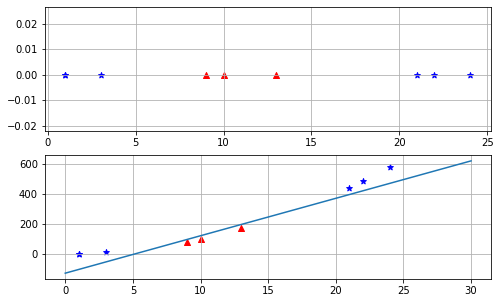

In [3]:
plot_kernel_example()

* Adding polynomial features is simple to implement and can work great with all sorts of ML algorithms.
* At a **low polynomial** degree it cannot deal with more complex datasets.
* At a **high polynomial** degree there are a lot of features, which makes the computation very slow.
    * Computation in the feature space can be costly because it is high dimensional (even go to infinity).
* **The Kernel Trick** comes to the rescue!
    * It makes it possible to get the same result as if you added many features (even in high dimension), **without actually adding them**!
        * So there is no computational disaster resulting from the large number of features.

### <img src="https://img.icons8.com/dusk/64/000000/witch.png" style="height:50px;display:inline"> The Kernel Trick
     
* When the **data points**, $\{x^{(i)}\}_{i=1}^m$, only appear as **inner (dot) products** - $(x^{(i)})^Tx^{(j)}$, we can apply the kernel trick.
* As long as we can calculate the inner product in the **feature space**, we don't need the mapping explicitly.
    * The kernel function, denoted $K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T\phi(x^{(j)})$, stands for the inner product in the feature space, and can easily plugged into the optimization.
    * If we could find a function $K(x^{(i)}, x^{(j)})$ that is simple enough, we can actually save us the huge number of calculations required to calculate $\phi(x^{(i)})^T\phi(x^{(j)})$, or even prevent us from the feature extraction itself, $\phi(x)$, this is the **kernel trick**.

* There are no restrictions on the form of $x^{(i)}, x^{(j)}$, but there are restrictions on the kernel function $K(x^{(i)}, x^{(j)})$
    * $K(x^{(i)}, x^{(j)})$ must satisfy the **Mercer Condition** - the $n \times n$ kernel matrix $K(x^{(i)}, x^{(j)})$ is **PSD**
    * This implies that the quadratic optimization is convex
        * It has a uniuqe solution and can be solved efficiently
* **Mercer's Theorem**: *Suppose that $k(x,y)$ is a symmetric real valued function such that $k(x,y) \leq C$ for some $C>0$. Suppose the linear operator* $$ \mathcal{L}(f)(x) = \int_{\mathcal{R}^D} k(x,y)f(y)dy $$ *is PSD, that is $$ \int\int_{\mathcal{R}^D} k(x,y)f(y)dydx \geq 0 $$ Let $\psi_i$ be the normalized orthogonal eigenfunctions of $\mathcal{L}$, associated with eigenvalues $\lambda_i >0$, sorted in non-decreasing order, and let $m$ be the number of non-zero eigenvalues. Then, the sequence of eigenvalues is summable, namely $\sum_i \mid \lambda_i \mid < \infty$, and the kernel can be expressed as * $$ k(x,y) = \sum_{i=1}^m \lambda_i \psi_i(x)\psi_i(y) $$ *We thus see that by choosing $\phi_i(x) = \sqrt{\lambda_i} \psi_i(x)$, a feature based representation is obtained.*

### <img src="https://img.icons8.com/office/80/000000/cool.png" style="height:50px;display:inline"> The Kernel Trick - Polynomial Kernel Example
* We will now demonstrate the kernel trick for a $2^{nd}$-degree polynomial mapping
* Suppose the feature mapping (or extraction) is defined as follows: $$ \phi(u)=\phi(\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}) = \begin{bmatrix} 1 \\ \sqrt{2}u_1 \\ \sqrt{2}u_2\\ \sqrt{2}u_1u_2 \\ u_1^2 \\ u_2^2 \end{bmatrix} $$

* The inner product $\phi(u)^T\phi(v)$: $$\phi(u)^T\phi(v) = 1 + 2u_1v_1 + 2u_2v_2 + 2u_1u_2v_1v_2 +u_1^2v_1^2 + u_2^2v_2^2 = (1 + u_1v_1 + u_2v_2)^2 = (1 + u^Tv)^2$$
    * **HOW ABOUT THAT?** - We just found out that we can calculate $\phi(u)^T\phi(v)$ just by calculating the input inner product $u^Tv$ and plugging it in $(1 + u^Tv)^2$, thus saving us the whole feature mapping calculation process!
* We define **the $2^{nd}$ polynomial kernel**: $$ K(u,v) = (1 + u^Tv)^2 $$
    * No need to calculate $\phi(u)^T\phi(v)$ explicitly!
    * The use of kernel function to avoid computing $\phi(\cdot)$ explicitly is known as **the kernel trick**

### <img src="https://img.icons8.com/color/96/000000/transformer.png" style="height:50px;display:inline"> Other Kernel Functions
* Linear kernel: $$ K(u,v) = u^Tv $$
* Polynomial kernel with degree $d$: $$ K(u,v) = (\alpha u^Tv + \beta)^d $$
    * The feature space is all monomials up to degree $d$

* **Radial Basis Function** (Gaussian RBF) kernel with width $\sigma$: $$ K(u,v) = e^{-\frac{||u-v||^2}{2\sigma^2}} = e^{-\gamma|| u-v ||^2} = exp(-\gamma|| u-v ||^2) $$
    * It is also a type of a *similarity function* that measures *how far are two points?*
    * RBF covers the space with "balls" of a fixed radius, where the centers are the support vectors (in SVM).
    * The radius of the "balls" is determined by the parameter $\gamma = \frac{1}{2\sigma^2}$
        * A **smaller** $\gamma$ means a larger radius, a lower "model complexity"
        * A **larger** $\gamma$ means a smaller radius, a finer grain coverage which may possibly lead to overfitting.
    * The feature space is **infinite-dimensional** (hint for HW: expand the exponential to an infinite series using Taylor).
    
* Sigmoid kernel, with parameters $\kappa$ and $\theta$: $$ K(u,v) = tanh(\kappa u^Tv + \theta) $$
    * It does not satisfy the *Mercer* condition on all $\kappa, \theta$

* Techniques for constructing new kernels (from *Pattern Recognition and Machine Learning*, C.Bishop): <img src="./assets/tut_xi_kernels.png" style="height:300px">

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Valid Kernels
Let $k_1(x,y)$ and $k_2(x,y)$ be valid kernels according to Mercer's theorem (that is, they represent an inner product in some transformed space). Prove that the following functions are valid kernels as well:

1. Prove: $$k(x,y) = k_1(x,y) + k_2(x,y)$$

2. Prove: $$k(x,y) = f(x)k_1(x,y)f(y) \: \:\text{where} \: \: f: \mathcal{R}^D \to \mathcal{R}$$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
The basic trick here is using the initial knowledge that both kernels are valid according to Mercer's theorem.

#### Section 1
* Prove for: $$k(x,y) = k_1(x,y) + k_2(x,y)$$

Using Mercer's theorem we know that there exists mappings $\phi_1(x)$ and $\phi_2(x)$ such that: $$ k_1(x,y) = \phi_1(x)^T \phi_1(y) $$ $$ k_2(x,y) = \phi_2(x)^T \phi_2(y) $$
Thus, $$ k(x,y) = k_1(x,y) + k_2(x,y) $$ $$ = \phi_1(x)^T \phi_1(y) + \phi_2(x)^T \phi_2(y) $$ $$ = [\phi_1(x), \phi_2(x)]^T[\phi_1(y), \phi_2(y)] = \Phi(x)^T\Phi(y) $$
   * $[\phi_1(x), \phi_2(x)]$ is a concatentanion of the vectors $\phi_1(x), \phi_2(x)$: $$\begin{bmatrix} \phi_{11}(x) & ... &\phi_{1n}(x) & \phi_{21}(x) & ... & \phi_{2m}(x) \end{bmatrix}^T$$
   * Thus, $k(x,y)$ represents an inner product in some transformed space.

#### Section 2

* Prove for: $$k(x,y) = f(x)k_1(x,y)f(y) \: \:\text{where} \: \: f: \mathcal{R}^D \to \mathcal{R}$$

Again, using Mercer's theorem: $$ k(x,y) =  f(x)k_1(x,y)f(y)$$ $$ =f(x)\phi_1(x)^T\phi_1(y)f(y) $$ $$ = \Phi(x)^T \Phi(y) $$ where $\Phi(x) = f(x)\phi_1(x)$.
   * Recall that $\phi_1(x)$ is a vector and $f(x)$ is a **scalar**.
   * Thus, $k(x,y)$ represents an inner product in some transformed space.

## <img src="https://img.icons8.com/officel/80/000000/galaxy.png" style="height:50px;display:inline">Nonlinear PCA - NLPCA (& Kernel PCA)
* The main shortcoming of PCA is that it is **unable to capture nonlinear structures in the data**.
* The basic idea behind Kernel PCA is that by embedding the data into a high-dimensional space for which linear sub-spaces capture the relavant structures.
* Mathematically: $$ x \in \mathcal{R}^D \xrightarrow{\text{nonlinear}} \phi(x) \in \mathcal{R}^m \xrightarrow{\text{linear}} y\in \mathcal{R}^d, m \geq D > d $$
(and usually $m >> D$)

* The basic steps of Nonlinear PCA:
    * Using the mapping $\phi(x)$, we map each data point $x_i \rightarrow \phi(x_i), \: i=1,...,n$.
    * As in regular PCA, we center (or normalize/standartize) the data. We define: $$ \Phi = \big(\phi(x_1)-\overline{\phi}, ..., \phi(x_n) - \overline{\phi} \big) \in \mathcal{R}^{m \times n}$$ $$ \overline{\phi} = \frac{1}{n}\sum_{j=1}^n \phi(x_j) $$
    * Define the sample covariance matrix: $$ \hat{P}_{\phi(x)} = \frac{1}{n} \sum_{j=1}^n \big(\phi(x_j) - \overline{\phi} \big) \big(\phi(x_j) - \overline{\phi} \big)^T = \frac{1}{n} \Phi\Phi^T \in \mathcal{R}^{m \times m} $$
    * Perform the *eigen-decomposition* of the sample covariance matrix: $$ \hat{P}_{\phi(x)} u_i = \lambda_i u_i, \: i=1,...,m $$
        * The $d$ *nonlinear* Principal Components (PCs): $$ y_i = u_i^T \big(\phi(x) -\overline{\phi} \big) \in \mathcal{R}, \: u_i \in \mathcal{R}^m, \: i=1,...,d $$

* Compuational cost:
    * Computing the eigenvectors of a $m \times m$ matrix requires (in general) $O(m^3)$ steps - very expensive for large $m$!
* **Note** - the features $\phi(x_i)$ need to be centered even if the $x_i$ are centered, since the mapping $\phi$ is **nonlinear**.
* Reducing the computational cost using the **Transpose Trick**:
    * The dimension $m$ of the feature space may be very large which may be very expensive computationally.
    * Using the *transpose trick* which is based on the relation between the eigen-decomposition of $\Phi\Phi^T$ and $\Phi^T\Phi$, we can reduce the cost.
        * Recall the the **eigenvalues** of $\Phi\Phi^T$ and $\Phi^T\Phi$ are equal.
    * Doing the same derivation as before (look up...) we get that if $w$ is an eigen-vector of $\Phi^T\Phi$ and $v$ is  an eigen-vector of $\Phi\Phi^T$ then: $$ u = \lambda^{-1} \Phi w $$
        * It is much cheaper to compute as the number of samples $n << m$.
    * The $d$ *nonlinear* Principal Components (PCs): $$ y_i = u_i^T \big(\phi(x) -\overline{\phi} \big) = \lambda^{-1}_{i} w_i^T\Phi^T\big(\phi(x) -\overline{\phi} \big) \in \mathcal{R}, u_i \in \mathcal{R}^m,\: i=1,...,d $$

### <img src="https://img.icons8.com/dusk/64/000000/greentech.png" style="height:50px;display:inline"> Kernel PCA
* Notice that the nonlinear PCs only require the computation of *inner products* between the features $\phi$. This indicates that we can use **the kernel trick** to calculate these inner products.
* We define the kernel and *centered kernel functions*: $$ k(x,y) = \phi(x)^T\phi(y)$$ $$ \tilde{k}(x,y) = \big(\phi(x) -\overline{\phi} \big)^T\big(\phi(y) -\overline{\phi} \big) $$
    * Note that: $$ \tilde{k}(x,y) = k(x,y) -\frac{1}{n}\sum_{j=1}^nk(x,x_j) -\frac{1}{n}\sum_{i=1}^nk(x_i,y) + \frac{1}{n^2}\sum_{i=1}^n \sum_{j=1}^n k(x_i, y_j)$$
    * Define the kernel and centered *kernel matrices*, which are defined w.r.t. the data points: $$ K=\big[k_{ij}\big], \: \: k_{ij}=k(x_i, x_j) $$ $$ \tilde{K} = \Phi^T\Phi = \big[\tilde{k}_{ij} \big], \: \: \tilde{k}_{ij} = \tilde{k}(x_i, x_j) $$

#### Claim

**The nonlinear PCs can be computed directly in terms of the matrix $\tilde{K}$.**

* It can be shown that: $$ \tilde{K} = \big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big)K\big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big) = JKJ $$
    * $\mathbb{1} = (1, 1, ..., 1)^T \in \mathcal{R}^{n}$


* We also define the vectors: $$ k_x = [k(x_1, x), ..., k(x_n,x)]^T $$ $$\tilde{k_x} = \Phi^T (\phi(x) - \overline{\phi}) = [\tilde{k}(x_1,x), ..., \tilde{k}(x_n, x)]^T $$
* The nonlinear PCs can then be computed as: $$ y_i = w_i^T\Phi^T\big(\phi(x) -\overline{\phi} \big) = w_i^T\tilde{k}_x, \: \: i=1,2,...,d $$
    * $w_i$ are the **eignevectors** of $\tilde{K}$: $$ \tilde{K}w_i = \lambda_iw_i $$ $$ ||w_i||^2=\lambda_i^{-1}, \: \: [w_1, ...,w_d] = V_d\Lambda_d^{-\frac{1}{2}} $$
    * $V_d$ and $\Lambda_d$ are obtained from the top-$d$ eigenvectors of $\tilde{K}$'s eigen-decomposition: $$ \tilde{K} = V_{\tilde{K}}\Lambda_{\tilde{K}}V_{\tilde{K}}^T $$
    * Concatenating the components $y_i$ we get (the projection): $$Y = (y_1, y_2, ...,y_d)^T = \Lambda_d^{-\frac{1}{2}}V_d^T\tilde{K} $$

        * Notice that $\Lambda_d^{-\frac{1}{2}}$ is the normaliztion factor (recall that $\Lambda_d$ is a diagonal matrix with the eigenvalues on the diagonal).

* The low-dimensional nonlinear representation is obtained from the top-$d$ eigenvectors of the matrix $\tilde{K}$.
    * The problem has been solved in the high-dimensional feature space $\phi$ while not explicitly computing $\phi$ or even working in $\mathcal{R}^m$

#### NLPCA Algorithm (Kernel PCA - KPCA)
* **Input**: A set of points $\mathcal{X} = \{x_1, x_2, ..., x_N \} \subset \mathcal{R}^D$, and a map $\phi: \mathcal{R}^D \rightarrow \mathcal{R}^M$ **or** a symmetric positive definite kernel function $\mathcal{k}: \mathcal{R}^D \times \mathcal{R}^D \rightarrow \mathcal{R}$

  1. Compute $\overline{\phi} = \frac{1}{N}\sum_j \phi(x_j)$ and the centered embedded data matrix $\Phi$ **or** the kernel matrix $K$. 
  2. Compute the centered kernel *matrix*: $$\tilde{\mathcal{K}} = \Phi^T\Phi \text{ or }  \tilde{\mathcal{K}} = \big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big)K\big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big) = JKJ \text{ or } \big(\tilde{\mathcal{k}}(x_i, x_j) \big) \in \mathcal{R}^{N \times N} $$
  3. Compute the eigenvectors $w_i \in \mathcal{R}^N$ of $\tilde{\mathcal{K}}$: $$ \tilde{\mathcal{K}} w_i = \lambda_iw_i $$ and normalize so that $||w_i||^2 = \lambda_i^{-1}$ (can be done as in step 4).
      * For every data point $x$, its $i^{th}$ nonlinear principal component is given by: $$ y_i = w_i^T\Phi^T(\phi(x) - \overline{\phi}) \text{ or } w_i^T[\tilde{\mathcal{k}}(x_1, x), ..., \tilde{\mathcal{k}}(x_N, x)]^T $$ for $i=1,2,...,d$
  4. The projection is given by: $$Y = (y_1, y_2, ...,y_d)^T = \Lambda_d^{-\frac{1}{2}}V_d^T\tilde{K} $$

* **Output**: A set of points $\{y_j\}_{j=1}^N$ lying in $\mathcal{R}^d$, where $y_{ij}$ in the $i^{th}$ nonlinear principal component of $x_j$ for $i=1,...,d$ and $j=1,...,N$

In [4]:
def plot_circles_example():
    # example - circles
    X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
    pca = PCA(n_components=2)
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)  # Radial Basis Function kernel
    X_pca = pca.fit_transform(X)
    X_kpca = kpca.fit_transform(X)

    # plot
    fig = plt.figure(figsize=(10,4))

    # original data
    ax1 = fig.add_subplot(1,3,1)
    ax1.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
    ax1.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax1.grid()
    ax1.set_title("original data")

    # pca
    ax2 = fig.add_subplot(1,3,2)
    ax2.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax2.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax2.grid()
    ax2.set_title("PCA")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    # kpca
    ax3 = fig.add_subplot(1,3,3)
    ax3.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax3.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax3.grid()
    ax3.set_title("KPCA")
    ax3.set_xlabel("PC1")
    ax3.set_ylabel("PC2")

    plt.tight_layout()

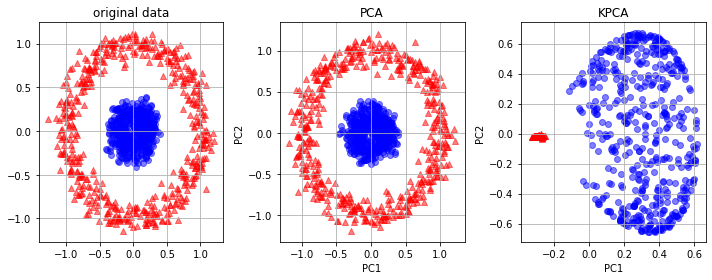

In [5]:
plot_circles_example()

In [6]:
def plot_moons_example():
    # example - moons
    X, y = make_moons(n_samples=100, random_state=123)
    pca = PCA(n_components=2)
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)  # Radial Basis Function kernel
    X_pca = pca.fit_transform(X)
    X_kpca = kpca.fit_transform(X)

    # plot
    fig = plt.figure(figsize=(10,4))

    # original data
    ax1 = fig.add_subplot(1,3,1)
    ax1.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
    ax1.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax1.grid()
    ax1.set_title("original data")

    # pca
    ax2 = fig.add_subplot(1,3,2)
    ax2.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax2.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax2.grid()
    ax2.set_title("PCA")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    # kpca
    ax3 = fig.add_subplot(1,3,3)
    ax3.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax3.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax3.grid()
    ax3.set_title("KPCA")
    ax3.set_xlabel("PC1")
    ax3.set_ylabel("PC2")

    plt.tight_layout()

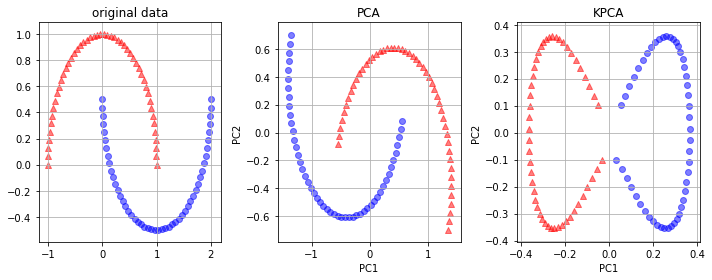

In [7]:
plot_moons_example()

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos

#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* The Kernel Trick - <a href="https://www.youtube.com/watch?v=JiM_LXpAtLc">Machine Learning Fundamentals - The Kernel Trick</a>
* Kernel PCA - <a href="https://www.youtube.com/watch?v=HbDHohXPLnU">David Thompson: Nonlinear Dimensionality Reduction: KPCA</a>




## <img src="https://img.icons8.com/dusk/50/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/